## KNN - Predict Diabetes

In [18]:
# import required libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [19]:
# Load data
df = pd.read_csv("datasets/diabetes.csv")
len(df) 

768

In [20]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Impute zero values with the mean

In [21]:
# List of columns that should not have zero values
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

# Iterate over each column in the list
for column in zero_not_accepted:
    # Replace zero values with NaN (missing value)
    df[column] = df[column].replace(0, np.NaN)
    
    # Calculate the mean of the column, skipping NaN values
    mean = int(df[column].mean(skipna=True))
    
    # Replace NaN values with the calculated mean
    df[column] = df[column].replace(np.NaN, mean)


### Train test split

In [22]:
# Train test split
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### Feature Scaling

- some algorithms, such as K-nearest neighbors (KNN) and support vector machines (SVM), are sensitive to the scale of the features and may produce inaccurate results if the features are not scaled appropriately.

In [23]:
# Scaler instance
sc_X = StandardScaler()
# Scale X_train qnd X_test
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Make Predictions

In [24]:
# KNN classifier
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [25]:
# Fit classifier to training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Model Evaluation Metrics

In [27]:
cm = confusion_matrix(y_test, classifier.predict(X_test))
cm


array([[94, 13],
       [15, 32]], dtype=int64)

In [28]:
print(f1_score(y_test, y_pred))

0.6956521739130436


In [29]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


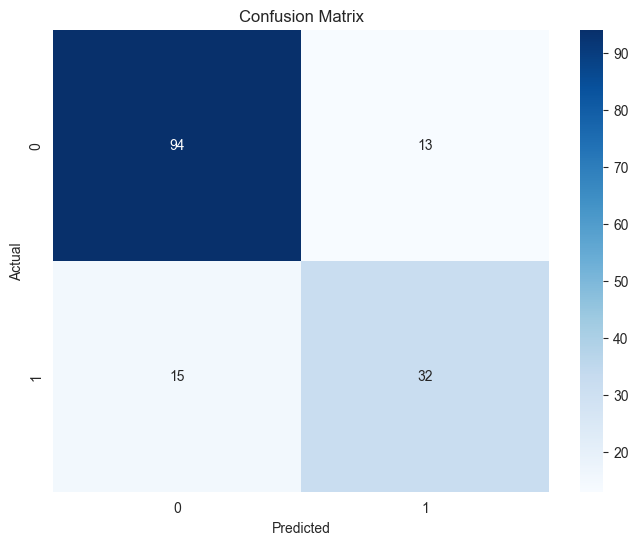

In [35]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### Put the model to use:

In [41]:
# Prepare new data
new_data = pd.DataFrame({'Pregnancies': [0, 1, 2], 'Glucose': [150, 180, 200], 'BloodPressure': [70, 80, 90], 'SkinThickness': [30, 35, 40], 'Insulin': [50, 60, 70], 'BMI': [25, 35, 40], 'DiabetesPedigreeFunction': [0.5, 0.6, 0.7], 'Age': [25, 30, 35]})

# Scale the new data
new_data_scaled = sc_X.transform(new_data)

# Make predictions
new_predictions = classifier.predict(new_data_scaled)

# Print the predictions
print(new_predictions)

# Print the predictions and the corresponding probabilities
for i in range(len(new_predictions)):
    if new_predictions[i] == 0:
        print(f"Prediction for data point {i+1}: False (Probability: {1 - classifier.predict_proba(new_data_scaled)[i][1]:.2f})")
    else:
        print(f"Prediction for data point {i+1}: True (Probability: {classifier.predict_proba(new_data_scaled)[i][1]:.2f})")


[0 1 1]
Prediction for data point 1: False (Probability: 0.55)
Prediction for data point 2: True (Probability: 0.82)
Prediction for data point 3: True (Probability: 0.82)
